# USA Accidents Exploratory Data Analysis
## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

## Importing Dataset (Source: Kaggle)
Note: Data does not include New York

In [2]:
accidents = pd.read_csv("US_Accidents_Dec20_updated.csv")
accidents.head()

C:\Users\aryam\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


## Data Preparation and Cleaning
- Explore information about columns of Data Set
- Fix any missing or incorrect values

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102140 entries, 0 to 102139
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     102140 non-null  object 
 1   Severity               102140 non-null  int64  
 2   Start_Time             102140 non-null  object 
 3   End_Time               102140 non-null  object 
 4   Start_Lat              102140 non-null  float64
 5   Start_Lng              102140 non-null  float64
 6   End_Lat                102140 non-null  float64
 7   End_Lng                102140 non-null  float64
 8   Distance(mi)           102140 non-null  float64
 9   Description            102140 non-null  object 
 10  Number                 24320 non-null   float64
 11  Street                 102140 non-null  object 
 12  Side                   102140 non-null  object 
 13  City                   102126 non-null  object 
 14  County                 102140 non-nu

In [4]:
accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,102140.000000,102140.000000,102140.000000,102140.000000,102140.000000,102140.000000,24320.000000,99884.000000,17951.000000,99793.000000,100385.000000,99555.000000,85281.000000,11542.000000
mean,2.441257,36.663098,-89.570617,36.663193,-89.570407,0.740067,6523.259745,63.799525,26.515164,66.537723,30.030029,9.343818,8.926741,0.071666
std,0.704603,5.085084,13.592929,5.085245,13.592979,1.827308,11049.748201,20.067284,17.661438,20.268466,0.297619,3.089325,6.012375,0.532330
min,2.000000,25.129476,-123.526160,25.130927,-123.526160,0.000000,1.000000,-20.200000,-41.500000,4.000000,20.410000,0.000000,0.000000,0.000000
25%,2.000000,33.083380,-95.458890,33.083737,-95.457930,0.104000,1032.000000,51.100000,16.600000,52.000000,29.920000,10.000000,5.800000,0.000000
50%,2.000000,37.701070,-85.812645,37.701296,-85.813880,0.372000,3499.000000,68.000000,28.500000,68.000000,30.030000,10.000000,8.100000,0.010000
75%,3.000000,40.931170,-80.378490,40.929810,-80.378400,0.700000,8397.250000,79.000000,36.800000,83.000000,30.150000,10.000000,11.500000,0.040000
max,4.000000,48.564331,-67.849851,48.580446,-67.849851,151.525000,851799.000000,129.200000,101.000000,100.000000,30.920000,111.000000,822.800000,10.020000


### Percentage of missing values

<AxesSubplot:>

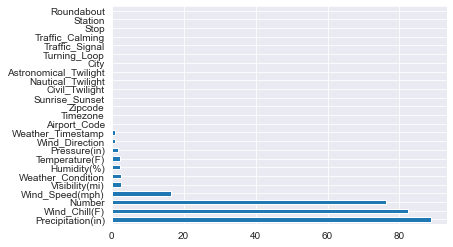

In [5]:
percent_missing = accidents.isna().sum().sort_values(ascending = False)/len(accidents)*100
percent_missing[percent_missing > 0].plot(kind = 'barh')

Number, Wind Chill and Precipitation columns have a very high proportion of missing values and therefore should not be considered for analysis.

## Exploratory Analysis and Visualisation
Columns we will analyse:  
1. City
2. Start Time
3. Start Lat
4. Temperature
5. Weather Conditions

### City

In [6]:
# Number of cities in dataset
len(accidents.City.unique())

5484

In [7]:
cities_by_accident = accidents.City.value_counts()
cities_by_accident[:20]

Charlotte      4809
Houston        3436
Dallas         3076
Chicago        2141
Miami          2077
Orlando        1606
Atlanta        1240
Minneapolis    1155
Kansas City    1151
Los Angeles    1120
Saint Louis    1063
Saint Paul      872
Phoenix         831
Detroit         811
Fort Worth      743
Milwaukee       707
Tampa           687
Nashville       678
Raleigh         660
Columbus        606
Name: City, dtype: int64

Charlott and Houston have the most accidents in the dataset.

<AxesSubplot:>

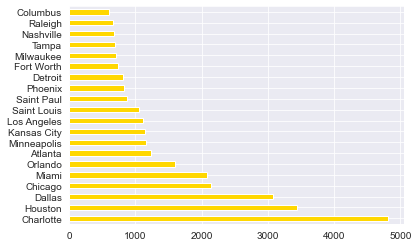

In [8]:
cities_by_accident[:20].plot(kind = "barh", color = "gold")

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

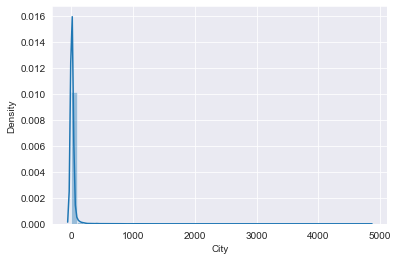

In [9]:
sns.distplot(cities_by_accident)

In [10]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [11]:
len(high_accident_cities)

11

Only 11 cities have more than 1000 accidents

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

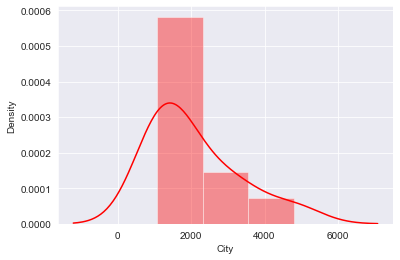

In [12]:
sns.distplot(high_accident_cities, color = "red")

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

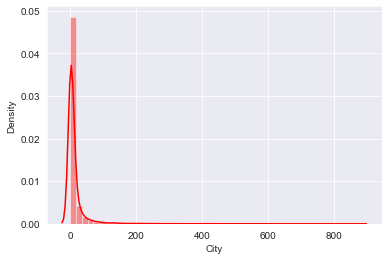

In [13]:
sns.distplot(low_accident_cities, color = "red")

In [14]:
len(cities_by_accident[cities_by_accident <= 5])/len(cities_by_accident)

0.6190041947838775

Majority of cities have less than 5 accidents between 2016 and 2020

### Start Time

In [15]:
# Converting Start Time to datetime
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

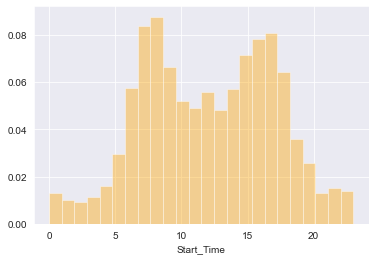

In [16]:
# Hourly distribution of accidents
sns.distplot(accidents.Start_Time.dt.hour, color = "orange", bins = 24, kde = False, norm_hist = True)

Most accidents occur in two clusters: when people are going to work and when people are returning from work.

<AxesSubplot:xlabel='Start_Time'>

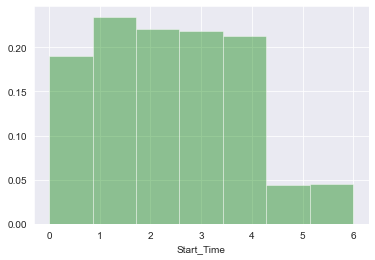

In [17]:
# Daily number of accidents:
sns.distplot(accidents.Start_Time.dt.dayofweek, color = "green", bins = 7, kde = False, norm_hist = True)

Proportion of accidents is significantly lower on weekends as people stay at home and those who drive do so without stress.

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

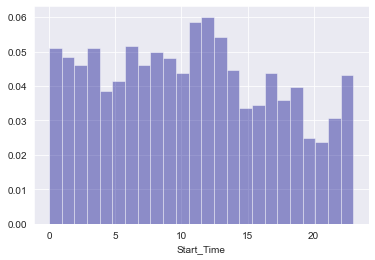

In [18]:
# Distribution of accidents on Sundays
sunday_accidents = accidents.Start_Time[accidents.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_accidents.dt.hour, bins = 24, kde = False, norm_hist = True, color = "darkblue")

Accidents are distributed evenly on Sundays

C:\Users\aryam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

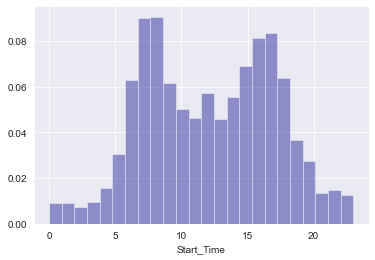

In [19]:
# Distribution of accidents on Mondays:
monday_accidents = accidents.Start_Time[accidents.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_accidents.dt.hour, bins = 24, kde = False, norm_hist = True, color = "darkblue")

Distribution of accidents on Mondays is similar to overall trend.

<AxesSubplot:xlabel='Start_Time'>

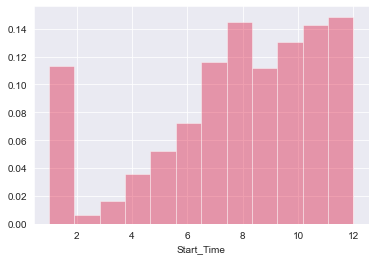

In [20]:
# Monthly Distribution of accidents:
sns.distplot(accidents.Start_Time.dt.month, color = "crimson", bins = 12, kde = False, norm_hist = True)

In summer, proportion of accidents is lower and increase during the winter, specially during the Holiday Season

### Start Latitude and Start Longitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

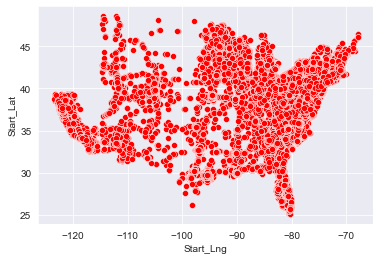

In [21]:
sns.scatterplot(x = accidents.Start_Lng, y = accidents.Start_Lat, color = "red")

More accidents occur on the East Coast.

### Temperature

In [22]:
accidents["Temperature(F)"]

0         42.1
1         36.9
2         36.0
3         36.0
4         39.0
          ... 
102135    62.1
102136    86.0
102137    90.0
102138    61.0
102139    57.9
Name: Temperature(F), Length: 102140, dtype: float64

In [23]:
accidents["Count"] = 1

<AxesSubplot:xlabel='Temperature(F)', ylabel='Count'>

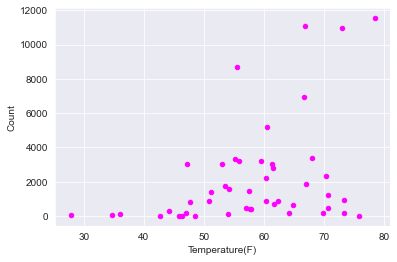

In [24]:
acc_by_state = accidents.groupby("State").agg({"Count" : "sum", "Temperature(F)" : "mean"})
acc_by_state.plot(kind = "scatter", x = "Temperature(F)", y = "Count", color = "magenta")

There seems to be a slight positive corelation between number of accidents and temperature.

### Weather Conditions

In [25]:
accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Count'],
      dtype='object')

<AxesSubplot:ylabel='Weather_Condition'>

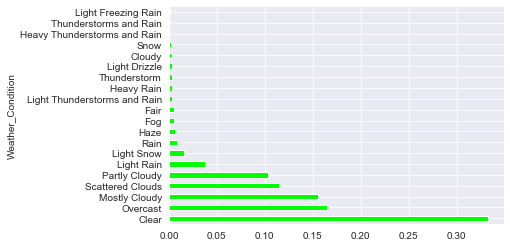

In [26]:
acc_by_weather = accidents.groupby("Weather_Condition").sum("Count")
acc_by_weather = acc_by_weather.sort_values(by =  "Count", ascending = False)
acc_by_weather["proportion"] = acc_by_weather["Count"]/len(accidents)
acc_by_weather[:20]["proportion"].plot(kind = "barh", color = "lime")

Over 30% accidents occur in clear conditions. Bad weather does not seem to be a major cause of accidents.

## Analysis and Insights
1. There are very few (11) cities with more than 1000 accidents.
2. 62% cities have less than 5 accidents.
3. A high percentage of accidents happen between 6 a.m. to 10 a.m. probably because of people being in a hurry to get to work. A lot of accidents also occur between 3 p.m. and 6 p.m. 
4. On Sunday, peak number of accidents occurs between 10 a.m. and 3 p.m. unlike weekdays
5. No. of accidents rises during winters maybe due to poor weather and visibility and because of higher traffic during holiday season.
6. Bad weather does not seem to be a major cause of accidents in winter since 30% of all accidents occur in clear conditions and there is a positive correlation between temperature and number of accidents>